# Pengertian K-Means Clustering
-K Means clustering adalah algoritma unsupervised machine learning yang digunakan untuk pengelompokan data dan pengenalan pola. 

-Caranya adalah dengan memilih beberapa titik data awal (k) secara acak, lalu memindah-mindahkannya hingga pengelompokan yang paling ideal ditemukan. 

-K Means clustering sering digunakan dalam berbagai bidang, seperti segmentasi gambar, segmentasi pelanggan, riset pasar, dan pengelompokan dokumen.

## Proses K Means Clustering

-Pilih jumlah cluster (k) yang ingin dibuat, misalnya, k=3.

-Pilih titik data k secara acak dan letakkan tiap titik ke cluster-nya sebagai centroid (pusat cluster) awal. Gambar di bawah ini menunjukkan tanda x sebagai centroid-nya.

-Kelompokkan semua titik data sesuai dengan jarak centroid terdekat yang telah dibuat. Langkah ini membutuhkan penghitungan jarak menggunakan Euclidean distance. 

-Ulangi langkah 3 hingga centroid yang ideal ditemukan, yaitu saat titik-titik data pada cluster tidak lagi bervariasi. Penghitungan K Means clustering dapat dilakukan menggunakan tools seperti Java, Python, Matlab, dan R. 

## Kelebihan K Means Clustering: 

-Sederhana: dapat digunakan oleh orang-orang dengan pengetahuan pemrograman yang terbatas.
Mampu mengolah kumpulan data besar: dapat digunakan pada data dalam jumlah besar tanpa menghabiskan terlalu banyak waktu.

-Konvergensi: algoritma ini pada akhirnya akan menghasilkan kumpulan cluster yang stabil.
Adaptasi dengan data baru: saat titik data baru tersedia, algoritma baru dapat dijalankan kembali untuk memasukkannya ke dalam cluster.

-Generalisasi: dapat melakukan generalisasi cluster dengan berbagai bentuk dan ukuran, seperti cluster elips, sehingga dapat digunakan untuk menemukan pola dalam berbagai kumpulan data.

## Kekurangan K Means Clustering:

-Memilih secara manual: jumlah cluster (k) harus dipilih secara manual, yang bisa jadi sulit dan subjektif. Memilih nilai k yang salah dapat mengakibatkan hasil pengelompokan yang buruk, dan memilih nilai k yang optimal membutuhkan pengetahuan yang cukup mengenai kumpulan data.

-Bergantung pada nilai centroid awal: karena bergantung pada nilai centroid yang ada di awal, algoritma ini mungkin tidak selalu dapat menemukan clustering yang ideal, sehingga perlu menjalankan algoritmanya beberapa kali untuk menemukan solusi optimal.

-Pengelompokan data dengan berbagai ukuran dan kepadatan: kelompok dalam data yang memiliki ukuran dan kepadatan berbeda dapat mengakibatkan beberapa cluster jadi tidak seimbang. Hal ini dapat mempersulit interpretasi cluster yang dihasilkan.

-Pengelompokan outlier: outlier adalah titik data yang secara signifikan berbeda dari titik data lain dalam suatu kumpulan data. Outlier dapat mendistorsi hasil pengelompokan dengan menarik centroid menjauh dari pusat cluster yang sebenarnya. 

-Penghitungan data dengan banyak dimensi: dengan bertambahnya jumlah dimensi, pengelompokan data akan sulit karena perhitungan jarak antara titik data dan centroid menjadi lebih kompleks. Maka dari itu, diperlukan proses untuk mengurangi dimensi atau modifikasi algoritma.

## Kenapa memilih K Means Clustering?


### 1 Suatu proyek membutuhkan banyak kontributor
Jika sedang mengerjakan proyek yang melibatkan banyak kontributor, K Means clustering merupakan pilihan yang ideal karena algoritma ini cukup populer sehingga banyak orang familiar dengannya. Dengan demikian, kolaborasi proyek dapat berjalan dengan baik. 

### 2 SDM memiliki pengetahuan terbatas
K Means clustering juga dapat berguna jika suatu perusahaan memiliki pengetahuan terbatas mengenai machine learning yang kompleks. Algoritma ini cukup mudah dipahami dan banyak sumber untuk mempelajarinya. 

### 3 Kumpulan data yang besar
K Means clustering berguna untuk mengelompokkan data yang besar. Pengelompokan kumpulan data besar secara manual bisa memakan waktu dan rentan terhadap kesalahan. Dengan K Means clustering, proses grouping data dapat berjalan secara otomatis sehingga perusahaan bisa fokus pada analisis dan interpretasi hasil saja.

# Import Library

Bagian ini digunakan untuk mengimpor library yang dibutuhkan, yaitu pandas, numpy, dan matplotlib.

In [1]:
import pandas as pd #untuk manipulasi data dalam bentuk tabel.
import numpy as np #untuk manipulasi data numerik.
import matplotlib.pyplot as plt #untuk membuat grafik.
#Andre Zuliani_202131031

# Pemilihan Dataset

# Membaca Dataset
Bagian ini digunakan untuk membaca dataset pada file csv dengan memberikan nama variabel.

In [2]:
data = pd.read_csv("userbehaviour.csv", sep=';') #membaca file.csv dan memberikan nama variabelnya
data #nama variabel yang ingin dimunculkan
#Andre Zuliani_202131031

,userid,Average Screen Time,Average Spent on App (INR),Left Review,Ratings,New Password Request,Last Visited Minutes
0,1001,1700,63400,1,9,7,2990
1,1002,0,5400,0,4,8,24008
2,1003,3700,20700,0,8,5,971
3,1004,3200,44500,1,6,2,799
4,1005,4500,42700,1,5,6,3668
...,...,...,...,...,...,...,...
494,1495,2800,7500,0,9,7,500
495,1496,4600,5300,1,7,1,2569
496,1497,3400,36600,1,5,1,2581
497,1498,900,1500,1,1,2,2196


In [3]:
data.columns #Untuk melihat beberapa kolom

Index(['userid', 'Average Screen Time', 'Average Spent on App (INR)',
       'Left Review', 'Ratings', 'New Password Request',
       'Last Visited Minutes'],
      dtype='object')

In [4]:
data.shape #melihat baris 499 dengan kolom 7

(499, 7)

# Preprocessing Data

## Membersihkan Data

In [5]:
data.replace("?", np.nan, inplace= True) #membersihkan data yang masih ada tanda tanya

data tidak ada tanda tanya, berarti tidak perlu dibersihkan

In [6]:
categorical_col = [] #Inisialisasi kolom
for column in data.columns:  #membuat iterasi kolom yang ada pada data
    if data[column].dtype == object and len(data[column].unique()) <= 50: #mengecek level/isi data kolom (bisa object, int, dan tipe data lainnya)
        categorical_col.append(column) #menambahkan kolom 
        print(f"{column} : {data[column].unique()}") #mencetak informasi kolom
        print("====================================")

In [7]:
data.info() #Membuka data info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   userid                      499 non-null    int64
 1   Average Screen Time         499 non-null    int64
 2   Average Spent on App (INR)  499 non-null    int64
 3   Left Review                 499 non-null    int64
 4   Ratings                     499 non-null    int64
 5   New Password Request        499 non-null    int64
 6   Last Visited Minutes        499 non-null    int64
dtypes: int64(7)
memory usage: 27.4 KB


In [8]:
data.isnull().values.any() #Jika True artinya ada data yg hilang, jika false berarti datanya lengkap

False

data tidak ada yang hilang, karena hasilnya false berarti datanya lengkap

# Memilih data dari dataset untuk digunakan sebagai atribut X

In [9]:
data = data[["Average Screen Time", "Average Spent on App (INR)"]] #Membuat kolom W1 sebagai X1 dan kolom W2 sebagai x2 dengan memberi inisiasi nama variabel data
data.head(10) #Menampilkan data dari urutan 10 teratas pada kolom W1 dan W2
#Andre Zuliani_202131031

,Average Screen Time,Average Spent on App (INR)
0,1700,63400
1,0,5400
2,3700,20700
3,3200,44500
4,4500,42700
5,2800,59900
6,4900,88700
7,800,3100
8,2800,74100
9,2800,52400


# Melihat Ringkasan Statistik

In [10]:
data.describe() #untuk melihat deskripsi data
#Andre Zuliani_202131031

,Average Screen Time,Average Spent on App (INR)
count,499.000000,499.000000
mean,2436.673347,42105.410822
std,1434.625511,31037.877992
min,0.000000,0.000000
25%,1300.000000,9650.000000
50%,2400.000000,39600.000000
75%,3600.000000,69050.000000
max,5000.000000,99800.000000


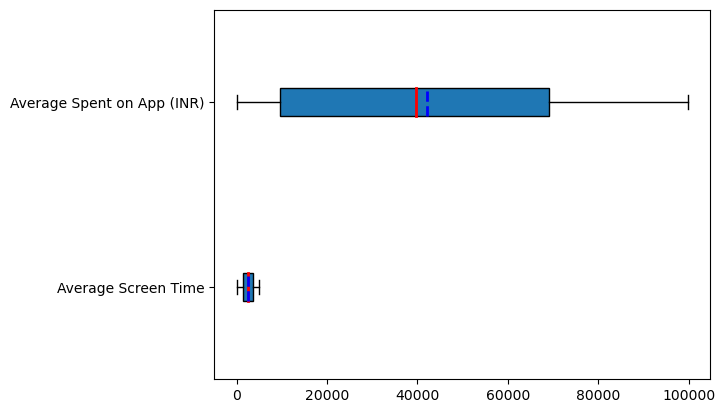

In [11]:
fig, ax = plt.subplots() #sebagai variabel untuk menyimpan objek figure dan axes
ax.boxplot(data, #variabel data yang akan di plot (data w1 dan w2)
          vert = False, #untuk menentukan plot berbentuk horizontal
          showmeans = True, #menentukan nilai mean
          meanline = True, #untuk garis mean yang akan ditampilkan 
          labels = ("Average Screen Time", "Average Spent on App (INR)"), #untuk memberikan label w1 dan w2
          patch_artist = True, #untuk kotak yang diwarnai
          medianprops = {"linewidth" : 2, "color" : "red"}, #untuk properti garis median
          meanprops = {"linewidth" : 2, "color" : "blue"}) #untuk properti garis mean
plt.show() #untuk menampilkan plot dari proses diatas
#Andre Zuliani_202131031

# Buang Outlier

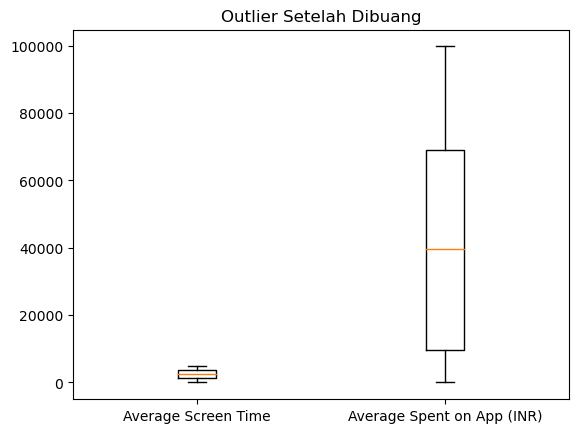

In [12]:
#q1, q3, dan IQR
kolom = ["Average Screen Time", "Average Spent on App (INR)"]

Q1 = data[kolom].quantile(0.25)
Q3 = data[kolom].quantile(0.75)

#Menghapus data yang termasuk outlier, yaitu data yang berada di luar rentang Q1-1.5*IQR hingga Q3+1.5*IQR.
IQR = Q3-Q1
data = data[~((data[kolom]<(Q1 - 1.5 * IQR)) |
             (data[kolom]>(Q3 + 1.5 * IQR))).any(axis = 1)]

plt.boxplot(data[kolom])
plt.xticks([1,2], kolom)
plt.title("Outlier Setelah Dibuang")
plt.show() #Menampilkan boxplot dari data data[kolom] setelah outlier dibuang.
#Andre Zuliani_202131031

#### Penjelasan boxplot
Boxplot adalah diagram yang digunakan untuk menampilkan distribusi data. Boxplot terdiri dari beberapa komponen, yaitu:

Titik tengah: Nilai rata-rata data.
Kotak: Rentang antara kuartil pertama dan ketiga.
Titik tengah kotak: Nilai median data.
Tali: Rentang antara kuartil pertama dan ketiga dibagi menjadi empat bagian yang sama.
Titik: Data yang berada di luar rentang tali.

In [13]:
data.describe() #Untuk menampilkan deskripsi data
#Andre Zuliani_202131031

,Average Screen Time,Average Spent on App (INR)
count,499.000000,499.000000
mean,2436.673347,42105.410822
std,1434.625511,31037.877992
min,0.000000,0.000000
25%,1300.000000,9650.000000
50%,2400.000000,39600.000000
75%,3600.000000,69050.000000
max,5000.000000,99800.000000


### Melihat Data Info

In [14]:
data.info() #untuk menampilkan info data
#Andre Zuliani_202131031

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 2 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   Average Screen Time         499 non-null    int64
 1   Average Spent on App (INR)  499 non-null    int64
dtypes: int64(2)
memory usage: 7.9 KB


## Mengubah data menjadi array

In [15]:
x_array = np.array (data) #untuk mengubah data yang disimpan dalam variabel data menjadi array NumPy. 
#array NumPy adalah struktur data yang efisien untuk menyimpan data numerik.
#Andre Zuliani_202131031

# Visualisasi Persebaran Data
untuk memvisualisasi persebaran data maka diperlukan plot scatter, plot scatter adalah diagram yang digunakan untuk menampilkan hubungan antara dua variabel numerik. Scatter plot terdiri dari titik-titik yang mewakili pasangan nilai dari dua variabel tersebut.

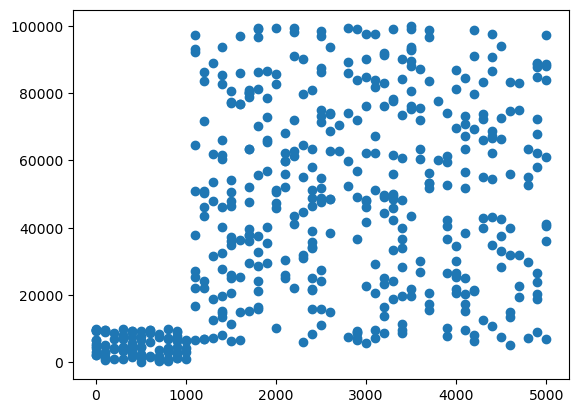

In [16]:
plt.scatter(data['Average Screen Time'], data['Average Spent on App (INR)'])
plt.show() #untuk menampilkan hasil plot yang diolah sebe
#Andre Zuliani_202131031

Pada scatter plot pada gambar, titik-titik yang terletak di dekat garis diagonal menunjukkan bahwa nilai kedua variabel tersebut memiliki hubungan positif. Semakin dekat titik-titik tersebut ke garis diagonal, semakin kuat hubungan positifnya.

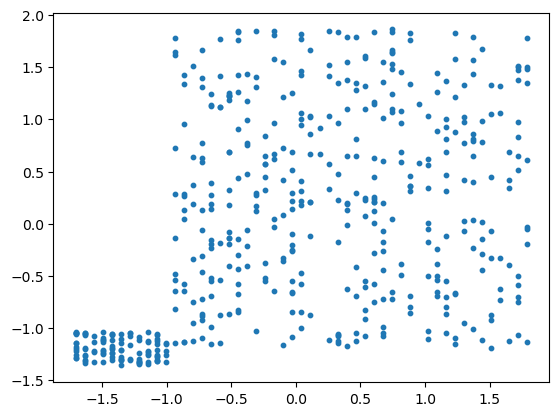

In [17]:
from sklearn.preprocessing import StandardScaler #untuk melakukan standardisasi data.
scaler = StandardScaler() #untuk menentukan standar scalanya dengan memberi nama variabel scaler
x_scaled = scaler.fit_transform(x_array) #membuat variabel x_scaled pada x_array
plt.scatter(x_scaled[:,0], x_scaled[:,1], s=10) #membuat plot scatter dengan ketebalan 10
plt.show() #untuk menampilkan plot yang diolah sebelumnya
#Andre Zuliani_202131031

# Standarisasi
### Tujuan dari standardisasi data adalah untuk:

Menjadikan data berskala sama: Menormalkan skala dari fitur yang berbeda sehingga memiliki distribusi yang sama, biasanya dengan mean 0 dan standar deviasi 1. Hal ini penting dalam beberapa model machine learning, seperti model linear dan model jarak, yang sensitif terhadap perbedaan skala fitur.
Meningkatkan performa model machine learning: Dalam beberapa kasus, standardisasi dapat meningkatkan performa model machine learning.

In [18]:
from sklearn.cluster import KMeans #mengimpor kmeans dari sklearn.cluster
sse = [] #membuat variabel baru
index = range(1,10) #index yang digunakan sebanyak 9 kali
for i in index :
    kmeans = KMeans(n_clusters=i, random_state=0, n_init=10)  # Ganti 10 dengan angka yang sesuai
    kmeans.fit(x_scaled)
    sse_ = kmeans.inertia_
    sse.append(sse_)
    print (i,sse_) #mwmunculkan nilai iterasi dan nilai dari variabel sse_
    #Andre Zuliani_202131031

D:\Users\User\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


1 998.0


D:\Users\User\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


2 480.0749213520157


D:\Users\User\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


3 293.4202053418868


D:\Users\User\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


4 195.07964175011125


D:\Users\User\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


5 143.7752947040899


D:\Users\User\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


6 120.71603733823632


D:\Users\User\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


7 102.41997774761009


D:\Users\User\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


8 85.31669111825902


D:\Users\User\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


9 72.57566302130985


Hasil nilai iterasi sesuai yang dibuat dengan nilai iterasi ke 10

# Cek Sum Of Square Error Dari Tiap Pembagian Jumlah Cluster
digunakan untuk mengecek jumlah kotak yang error dari tiap pembagian jumlah cluster

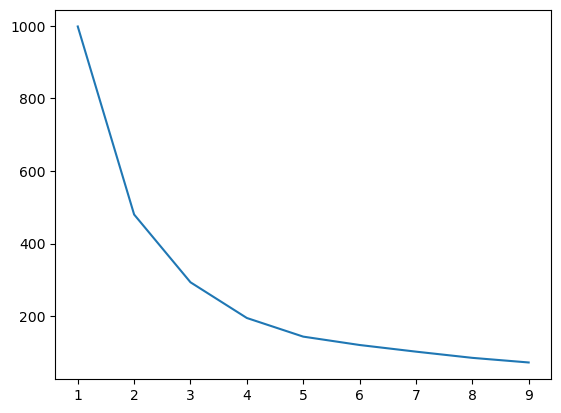

In [19]:
plt.plot(index, sse) #plot hasil iterasi x yang dibuat iterasi 9 kali dan y untuk nilai variabel sse_
plt.show()
#Andre Zuliani_202131031

# Membuat Model

In [20]:
kmeans = KMeans (n_clusters = 3, random_state = 0, n_init=10) #untuk membuat variabel nama dengan nilai cluster 3 dan inisiasi acak dengan jumlah iterasi ke 10
kmeans.fit(x_scaled) #untuk mendapatkan hasil dari kmeans
#Andre Zuliani_202131031

D:\Users\User\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(n_clusters=3, n_init=10, random_state=0)

# Melihat Cluster Pusat

In [21]:
kmeans.cluster_centers_ #untuk melihat hasil cluster pusat
#Andre Zuliani_202131031

array([[ 0.30522063,  1.06057331],
       [-1.0780563 , -0.92031375],
       [ 0.88819953, -0.40918923]])

Model Yang digunakan K-means dengan nilai kluster 3 dan inisialisasi dari nilai acak 10 dan memiliki nilai kluster pusatnya ([[ 0.30522063,  1.06057331], [-1.0780563 , -0.92031375], [ 0.88819953, -0.40918923]]) yang berarti dari hasil K-means ini pengguna aplikasi tidak berbeda jauh dari yang sudah di install atau mengunistall karena dilihat nilai kluster.

# Visualisasi Persebaran Data Setelah Clustering

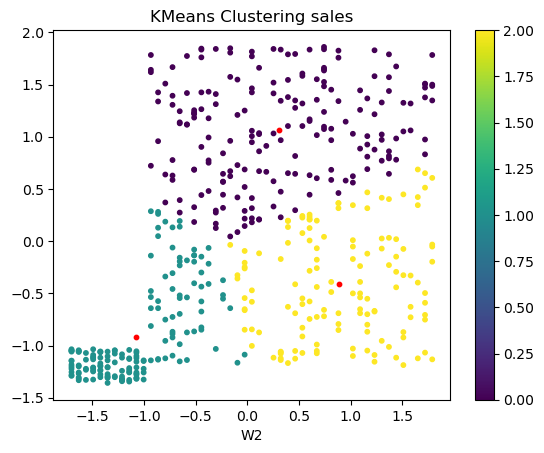

In [22]:
output = plt.scatter(x_scaled[:,0],x_scaled[:,1], s=10, c = kmeans.labels_) #Datanya

centers = kmeans.cluster_centers_ #membuat variabel baru dengan nama centers
plt.scatter(centers[:,0], centers[:,1], c="red", s=10) #membuat plot scatter dengan warna merah dan ukuran titik-titik 10
plt.title("KMeans Clustering sales") #memberi judul plot Kmeans Clustering sales
plt.xlabel("W1") #menentukan plot label y dengan w1
plt.xlabel("W2") #menetukan plot label x dengan w2
plt.colorbar(output) #untuk menampilkan hasil bar warna
plt.show() #untuk menampilkan plot
#Andre Zuliani_202131031

# Evaluasi Model
Memperbaiki model yang baru dengan evaluasi model davies_bouldin_score

Davies-Bouldin Index:
Davies-Bouldin Index mengukur sejauh mana sebuah klaster berada pada jarak yang optimal dari klaster lainnya. Semakin rendah nilai Davies-Bouldin Index, semakin baik pengelompokan klaster.


In [23]:
import sklearn #untuk mengimport library dari sklearn
from sklearn.metrics import davies_bouldin_score #mengimpor davies_bouldin_score dari sklearn.metrics
labels = kmeans.labels_ #membuat variabel baru dengan nama labels
davies_bouldin_score(x_scaled, labels) #membuat score yang baru antara gabungan variabel x_scaled dan labels
#Andre Zuliani_202131031

0.8452462307751949

Hasil evaluasi menunjukkan bahwa model KMeans Clustering dengan 3 cluster menghasilkan pemisahan data yang baik.
Data dalam cluster cukup mirip satu sama lain dan antar cluster terdapat pemisahan yang baik karena bernilai 84%.